In [120]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn import decomposition
from sklearn import metrics

In [121]:
testfile='../data/data_set_ALL_AML_independent.csv'
trainfile='../data/data_set_ALL_AML_train.csv'
patient_cancer='../data/actual.csv'

train = pd.read_csv(trainfile)
test = pd.read_csv(testfile)
patient_cancer = pd.read_csv(patient_cancer)

In [122]:
train_keepers = [col for col in train.columns if "call" not in col]
test_keepers = [col for col in test.columns if "call" not in col]

train = train[train_keepers]
test = test[test_keepers]

In [123]:
gene_description = train['Gene Description']
gene_accession_number = train['Gene Accession Number']
train = train.drop(['Gene Description','Gene Accession Number'],axis=1)
test = test.drop(['Gene Description','Gene Accession Number'],axis=1)
train = train.transpose()
test = test.transpose()

### PCA Analysis

In [124]:
def _pca(data, num_comp):
    pca = PCA(n_components=NUM_COMPONENTS)
    pca.fit(data)
    data_pca = pca.transform(data)
    return data_pca

In [125]:
from sklearn.decomposition import PCA
NUM_COMPONENTS = 2
# train
train_pca = _pca(train, NUM_COMPONENTS)
test_pca = _pca(test, NUM_COMPONENTS)



In [126]:
# patient cancer labels to 0 (ALL) and 1 (AML)
patient_cancer = np.array(patient_cancer)
patient_labels = []
for p in patient_cancer:
    if p[1] == 'ALL':
        patient_labels.append(0)
    else:
        patient_labels.append(1)

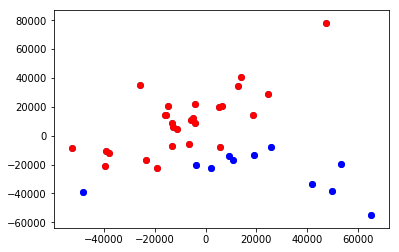

In [127]:
train_pca.shape
plt.scatter(train_pca[:,0], train_pca[:,1])
for i,p in enumerate(train_pca):
    if patient_labels[i] == 0:
        plt.scatter(train_pca[i,0], train_pca[i,1], color='r', label='ALL')
    else:
        plt.scatter(train_pca[i,0], train_pca[i,1], color = 'b', label='AML')

plt.show()

### Naive Bayes Classifier

In [128]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_pca, patient_labels[0:len(train_pca)])
predicted = clf.predict(test_pca)
test_labels = patient_labels[len(train_pca):]

In [129]:
print(metrics.classification_report(test_labels, predicted))

             precision    recall  f1-score   support

          0       0.61      0.70      0.65        20
          1       0.45      0.36      0.40        14

avg / total       0.55      0.56      0.55        34



### SVM Classifier

In [131]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_pca, patient_labels[0:len(train_pca)])
predicted = clf.predict(test_pca)
print(metrics.classification_report(test_labels, predicted))

             precision    recall  f1-score   support

          0       0.59      1.00      0.74        20
          1       0.00      0.00      0.00        14

avg / total       0.35      0.59      0.44        34



In [132]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])